In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})


In [17]:
repo_dir = os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd())))
out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [21]:
!find /oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/public_output -type f | sort

/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/public_output/snpnet_PRS/cancer_20190303.tsv
/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/public_output/snpnet_PRS/HC_20190303.tsv
/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/public_output/snpnet_PRS/test_20190306.tsv
/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/public_output/vanilla_PRS/cancer_20190302.tsv
/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/public_output/vanilla_PRS/HC_20190302.tsv
/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/public_output/vanilla_PRS/test_20190306.tsv


In [56]:
dfs_keys=[
    ('snpnet_PRS', 'cancer_20190303'),
    ('snpnet_PRS', 'HC_20190303'),
    ('snpnet_PRS', 'test_20190306'),
    ('vanilla_PRS', 'cancer_20190302'),
    ('vanilla_PRS', 'HC_20190302'),
    ('vanilla_PRS', 'test_20190306'),
]

In [52]:
import collections

In [55]:
dfs = collections.defaultdict(pd.DataFrame)

In [58]:
for model, dataset in dfs_keys:
    dfs[(model, dataset)] = pd.read_csv(
        os.path.join(repo_dir, 'public_output', model, '{}.tsv'.format(dataset)),
        sep='\t'
    )


In [59]:
df_cancer = pd.concat([
    dfs[('snpnet_PRS', 'cancer_20190303')], 
    dfs[ ('vanilla_PRS', 'cancer_20190302')]
])


In [60]:
df_HC = pd.concat([
    dfs[('snpnet_PRS', 'HC_20190303')], 
    dfs[ ('vanilla_PRS', 'HC_20190302')]
])


In [61]:
df_test = pd.concat([
    dfs[('snpnet_PRS', 'test_20190306')], 
    dfs[ ('vanilla_PRS', 'test_20190306')]
])


In [126]:
df_test[df_test['features'] == 'PRS']

,#GBE_ID,PRS_model,phe_type,features,R_or_AUC,phe_name,N
1,INI5255,snpnet_PRS,qt,PRS,0.184216,"Intra-ocular_pressure,_Goldmann-correlated_(ri...",81534
4,INI30150,snpnet_PRS,qt,PRS,0.284175,Eosinophill_count,327479


In [73]:
df_cancer[(df_cancer['features'] == 'PRS') & (df_cancer['N'] >= 4947)].sort_values(
    by=['N', '#GBE_ID', 'PRS_model'],
    ascending=[False, True, True]
)

,#GBE_ID,PRS_model,phe_type,features,R_or_AUC,phe_name,N
7,cancer1003,snpnet_PRS,bin,PRS,0.615739,skin_cancer,19170
19,cancer1003,vanilla_PRS_1e-3,bin,PRS,0.520476,skin_cancer,19170
22,cancer1003,vanilla_PRS_1e-4,bin,PRS,0.525972,skin_cancer,19170
25,cancer1003,vanilla_PRS_1e-5,bin,PRS,0.533172,skin_cancer,19170
112,cancer1060,snpnet_PRS,bin,PRS,0.624973,non-melanoma_skin_cancer,16791
403,cancer1060,vanilla_PRS_1e-3,bin,PRS,0.523553,non-melanoma_skin_cancer,16791
406,cancer1060,vanilla_PRS_1e-4,bin,PRS,0.528793,non-melanoma_skin_cancer,16791
409,cancer1060,vanilla_PRS_1e-5,bin,PRS,0.535415,non-melanoma_skin_cancer,16791
4,cancer1002,snpnet_PRS,bin,PRS,0.590213,breast_cancer,11243
10,cancer1002,vanilla_PRS_1e-3,bin,PRS,0.527138,breast_cancer,11243


In [75]:
df_cancer[(df_cancer['features'] == 'PRS') & (df_cancer['N'] < 4947) & (df_cancer['N'] >= 2815)].sort_values(
    by=['N', '#GBE_ID', 'PRS_model'],
    ascending=[False, True, True]
)

,#GBE_ID,PRS_model,phe_type,features,R_or_AUC,phe_name,N
34,cancer1020,snpnet_PRS,bin,PRS,0.549078,large_bowel_cancer/colorectal_cancer,4382
145,cancer1020,vanilla_PRS_1e-3,bin,PRS,0.514491,large_bowel_cancer/colorectal_cancer,4382
148,cancer1020,vanilla_PRS_1e-4,bin,PRS,0.532839,large_bowel_cancer/colorectal_cancer,4382
151,cancer1020,vanilla_PRS_1e-5,bin,PRS,0.524104,large_bowel_cancer/colorectal_cancer,4382
109,cancer1059,snpnet_PRS,bin,PRS,0.599826,malignant_melanoma,4099
394,cancer1059,vanilla_PRS_1e-3,bin,PRS,0.543784,malignant_melanoma,4099
397,cancer1059,vanilla_PRS_1e-4,bin,PRS,0.553175,malignant_melanoma,4099
400,cancer1059,vanilla_PRS_1e-5,bin,PRS,0.566501,malignant_melanoma,4099
67,cancer1038,snpnet_PRS,bin,PRS,0.589712,male_genital_tract_cancer,3449
37,cancer1022,snpnet_PRS,bin,PRS,0.532478,colon_cancer/sigmoid_cancer,3251


In [77]:
df_cancer[(df_cancer['features'] == 'PRS') & (df_cancer['N'] < 2815) & (df_cancer['N'] >= 1852)].sort_values(
    by=['N', '#GBE_ID', 'PRS_model'],
    ascending=[False, True, True]
)

,#GBE_ID,PRS_model,phe_type,features,R_or_AUC,phe_name,N
133,cancer1084,snpnet_PRS,bin,PRS,0.519721,respiratory_/_intrathoracic_cancer,2392
523,cancer1084,vanilla_PRS_1e-3,bin,PRS,0.500223,respiratory_/_intrathoracic_cancer,2392
526,cancer1084,vanilla_PRS_1e-4,bin,PRS,0.524770,respiratory_/_intrathoracic_cancer,2392
529,cancer1084,vanilla_PRS_1e-5,bin,PRS,0.501109,respiratory_/_intrathoracic_cancer,2392
40,cancer1023,snpnet_PRS,bin,PRS,0.547344,rectal_cancer,2026
163,cancer1023,vanilla_PRS_1e-3,bin,PRS,0.518686,rectal_cancer,2026
166,cancer1023,vanilla_PRS_1e-4,bin,PRS,0.517153,rectal_cancer,2026
169,cancer1023,vanilla_PRS_1e-5,bin,PRS,0.520616,rectal_cancer,2026
61,cancer1035,snpnet_PRS,bin,PRS,0.524728,bladder_cancer,1997
253,cancer1035,vanilla_PRS_1e-3,bin,PRS,0.505033,bladder_cancer,1997


In [79]:
df_cancer[(df_cancer['features'] == 'PRS') & (df_cancer['N'] < 1852) & (df_cancer['N'] >= 1093)].sort_values(
    by=['N', '#GBE_ID', 'PRS_model'],
    ascending=[False, True, True]
)

,#GBE_ID,PRS_model,phe_type,features,R_or_AUC,phe_name,N
136,cancer1085,snpnet_PRS,bin,PRS,0.505075,bone_metastases_/_bony_secondaries,1780
532,cancer1085,vanilla_PRS_1e-3,bin,PRS,0.502737,bone_metastases_/_bony_secondaries,1780
535,cancer1085,vanilla_PRS_1e-4,bin,PRS,0.509581,bone_metastases_/_bony_secondaries,1780
538,cancer1085,vanilla_PRS_1e-5,bin,PRS,0.523914,bone_metastases_/_bony_secondaries,1780
73,cancer1040,snpnet_PRS,bin,PRS,0.547875,uterine/endometrial_cancer,1610
100,cancer1053,snpnet_PRS,bin,PRS,0.528309,non-hodgkins_lymphoma,1429
367,cancer1053,vanilla_PRS_1e-3,bin,PRS,0.521776,non-hodgkins_lymphoma,1429
370,cancer1053,vanilla_PRS_1e-4,bin,PRS,0.530515,non-hodgkins_lymphoma,1429
373,cancer1053,vanilla_PRS_1e-5,bin,PRS,0.530004,non-hodgkins_lymphoma,1429
70,cancer1039,snpnet_PRS,bin,PRS,0.519753,ovarian_cancer,1208


In [97]:
def find_improvement_metric(df, GBE_ID, features='PRS'):
    dff = df[(df['features'] == features) & (df['#GBE_ID'] == GBE_ID)]
    df_vanilla = dff[dff['PRS_model'] != 'snpnet_PRS']
    df_snpnet  = dff[dff['PRS_model'] == 'snpnet_PRS'] 
    if( (len(df_vanilla) > 0) and (len(df_snpnet) > 0) ):
        return list(df_snpnet['R_or_AUC'])[0] - max(list(df_vanilla['R_or_AUC']))
    else:
        return np.nan
    


In [98]:
find_improvement_metric(df_cancer, 'cancer1053')

-0.002205699999999866

In [99]:
def get_GBEID2N(df):
    return dict(zip(df['#GBE_ID'], df['N']))

In [100]:
GBEID2N_cancer = get_GBEID2N(df_cancer)

In [103]:
GBEID_cancer = sorted(list(set(df_cancer['#GBE_ID'])))

In [107]:
improvements = dict([(x, find_improvement_metric(df_cancer, x)) for x in GBEID_cancer])

In [109]:
GBEID_cancer_subset = [x for x in GBEID_cancer if not np.isnan(improvements[x])]

In [119]:
dff = dfs[('snpnet_PRS', 'cancer_20190303')][
    (dfs[('snpnet_PRS', 'cancer_20190303')]['features']=='PRS') &
    (dfs[('snpnet_PRS', 'cancer_20190303')]['#GBE_ID'].map(lambda x:x in set(GBEID_cancer_subset)))
]

In [121]:
snpnet_AUC = dict(zip(dff['#GBE_ID'], dff['R_or_AUC']))


In [122]:
improvements_df = pd.DataFrame({
    '#GBE_ID': GBEID_cancer_subset,
    'delta_AUC': [improvements[x] for x in GBEID_cancer_subset],
    'N': [GBEID2N_cancer[x] for x in GBEID_cancer_subset],
    'AUC_snpnet': [snpnet_AUC[x] for x in GBEID_cancer_subset]
})

In [123]:
improvements_df['AUC_vanilla'] = improvements_df['AUC_snpnet'] + improvements_df['delta_AUC']

In [125]:
1

1

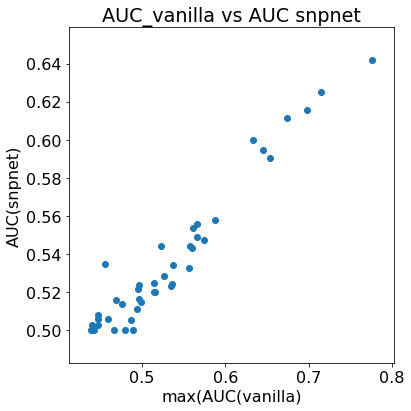

In [124]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]
ax = fig_axs[0]
ax.scatter(
    x = improvements_df['AUC_vanilla'],
    y = improvements_df['AUC_snpnet'],    
)    
ax.set_title('AUC_vanilla vs AUC snpnet')
ax.set_xlabel('max(AUC(vanilla)')
ax.set_ylabel('AUC(snpnet)')
gs.tight_layout(fig, rect=[0, 0, 1, 1]) 


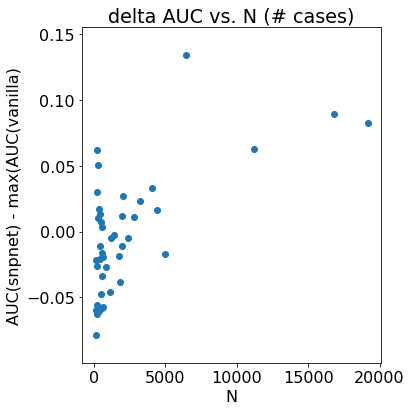

In [113]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]
ax = fig_axs[0]
ax.scatter(
    x = improvements_df['N'],
    y = improvements_df['delta_AUC'],    
)    
ax.set_title('delta AUC vs. N (# cases)')
ax.set_xlabel('N')
ax.set_ylabel('AUC(snpnet) - max(AUC(vanilla)')
gs.tight_layout(fig, rect=[0, 0, 1, 1]) 


/oak/stanford/groups/mrivas/users/ytanigaw/software/Anaconda3-5.3.0-Linux-x86_64_20181113/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


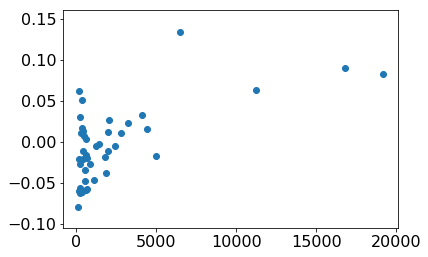

In [112]:
plt.scatter(
    x = improvements_df['N'],
    y = improvements_df['delta_AUC'],    
)

In [111]:
improvements_df

,#GBE_ID,delta_AUC,N
0,cancer1001,0.011579,1981
1,cancer1002,0.063075,11243
2,cancer1003,0.082567,19170
3,cancer1004,-0.057343,659
4,cancer1005,-0.078819,121
5,cancer1006,0.017114,362
6,cancer1011,0.050426,317
7,cancer1015,-0.021369,127
8,cancer1017,-0.019624,667
9,cancer1018,0.003286,568


In [ ]:
df_cancer[(df_cancer['features'] == 'PRS') & (df_cancer['N'] < 1093) & (df_cancer['N'] >= 1093)].sort_values(
    by=['N', '#GBE_ID', 'PRS_model'],
    ascending=[False, True, True]
)

In [ ]:
keep_dir = 

In [48]:
keep = pd.read_csv(
    os.path.join(
        repo_dir, 'private_output', 'vanilla_PRS', 'HC_20190302', '1_split', 'HC276.test'
    )    
)


In [49]:
keep.head()

,3730733 3730733
0,2173565\t2173565
1,1537775\t1537775
2,4447177\t4447177
3,4098711\t4098711
4,3763735\t3763735


In [47]:
os.path.join(
    
)


'/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/private_output/vanilla_PRS/HC_20190302/1_split/HC276.test'

In [30]:
df_vanilla = pd.read_csv(
    os.path.join(repo_dir, 'public_output', 'vanilla_PRS', 'HC_20190302.tsv'),
    sep='\t'
)

In [32]:
df_snpnet = pd.read_csv(
    os.path.join(repo_dir, 'public_output', 'snpnet_PRS', 'HC_20190303.tsv'),
    sep='\t'
)

In [36]:
df = pd.concat([df_vanilla, df_snpnet])

In [44]:
df[df['features'] == 'PRS'].sort_values(
    by=['N', '#GBE_ID', 'PRS_model'],
    ascending=[False, True, True]
)

,#GBE_ID,PRS_model,phe_type,features,R_or_AUC,phe_name,N
10,HC382,snpnet_PRS,bin,PRS,0.616059,asthma,43626
28,HC382,vanilla_PRS_1e-3,bin,PRS,0.509207,asthma,43626
31,HC382,vanilla_PRS_1e-4,bin,PRS,0.510497,asthma,43626
34,HC382,vanilla_PRS_1e-5,bin,PRS,0.507421,asthma,43626
4,HC281,snpnet_PRS,bin,PRS,0.620630,atrial_fibrillation,12665
10,HC281,vanilla_PRS_1e-3,bin,PRS,0.531538,atrial_fibrillation,12665
13,HC281,vanilla_PRS_1e-4,bin,PRS,0.537718,atrial_fibrillation,12665
16,HC281,vanilla_PRS_1e-5,bin,PRS,0.552396,atrial_fibrillation,12665
7,HC326,snpnet_PRS,bin,PRS,0.561820,heart_attack/myocardial_infarction,12138
19,HC326,vanilla_PRS_1e-3,bin,PRS,0.517016,heart_attack/myocardial_infarction,12138


In [45]:
df[df['features'] == 'PRS'][['#GBE_ID', 'PRS_model', 'R_or_AUC']]

,#GBE_ID,PRS_model,R_or_AUC
1,HC276,vanilla_PRS_1e-3,0.526570
4,HC276,vanilla_PRS_1e-4,0.541947
7,HC276,vanilla_PRS_1e-5,0.541490
10,HC281,vanilla_PRS_1e-3,0.531538
13,HC281,vanilla_PRS_1e-4,0.537718
16,HC281,vanilla_PRS_1e-5,0.552396
19,HC326,vanilla_PRS_1e-3,0.517016
22,HC326,vanilla_PRS_1e-4,0.514294
25,HC326,vanilla_PRS_1e-5,0.521715
28,HC382,vanilla_PRS_1e-3,0.509207


In [51]:
df[df['#GBE_ID'] == 'HC382']

,#GBE_ID,PRS_model,phe_type,features,R_or_AUC,phe_name,N
27,HC382,vanilla_PRS_1e-3,bin,covars,0.534092,asthma,43626
28,HC382,vanilla_PRS_1e-3,bin,PRS,0.509207,asthma,43626
29,HC382,vanilla_PRS_1e-3,bin,PRS_and_covars,0.533995,asthma,43626
30,HC382,vanilla_PRS_1e-4,bin,covars,0.534092,asthma,43626
31,HC382,vanilla_PRS_1e-4,bin,PRS,0.510497,asthma,43626
32,HC382,vanilla_PRS_1e-4,bin,PRS_and_covars,0.533907,asthma,43626
33,HC382,vanilla_PRS_1e-5,bin,covars,0.534092,asthma,43626
34,HC382,vanilla_PRS_1e-5,bin,PRS,0.507421,asthma,43626
35,HC382,vanilla_PRS_1e-5,bin,PRS_and_covars,0.533899,asthma,43626
9,HC382,snpnet_PRS,bin,covars,0.529141,asthma,43626


In [19]:
!ls /oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/PRS/public_output/vanilla_PRS

cancer_20190302.tsv  HC_20190302.tsv  test_20190306.tsv


In [ ]:
df_vanilla = pd.read_csv(
    os.path.join(repo_dir, 'public_output', 'vanilla_PRS', 'HC_20190302.tsv'),
    sep='\t'
)